# Machine Learning in Python

by [Piotr Migdał](http://p.migdal.pl/) & Dominik Krzemiński

for El Passion, 2017

## 6. Logistic Regression

Same dataset: https://archive.ics.uci.edu/ml/datasets/Student+Performance

* [Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression)
* [sklearn.linear_model.LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)


In [22]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

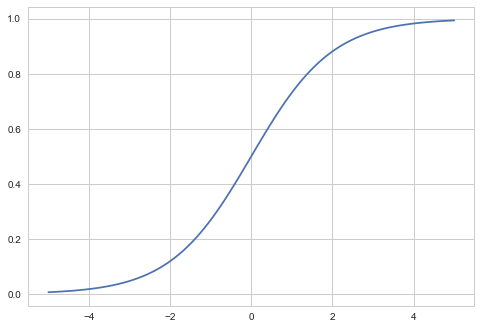

In [3]:
# logistic function
logit = np.linspace(-5, 5, num=100)
logistic = 1 / (1 + np.exp(-logit))
plt.plot(logit, logistic)

In [4]:
students = pd.read_csv("data/students_cleaner.csv")

In [7]:
# good grade
students["G"] = students["G1"] + students["G2"] + students["G3"]
students["good_G"] = students["G"] > students["G"].mean()

In [9]:
X = students.drop(['G', 'good_G', 'G1', 'G2', 'G3'], axis='columns')
Y = students['good_G']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [11]:
# more or less 50-50
Y.mean()

0.50539291217257321

In [16]:
lr_clf = LogisticRegression(C=1.)
lr_clf.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
# accuracy on the training dataset
lr_clf.score(X_train, Y_train)

0.79629629629629628

In [18]:
# accuracy on the test dataset
lr_clf.score(X_test, Y_test)

0.66257668711656437

In [24]:
confusion_matrix(Y_test, lr_clf.predict(X_test))

array([[43, 30],
       [25, 65]])

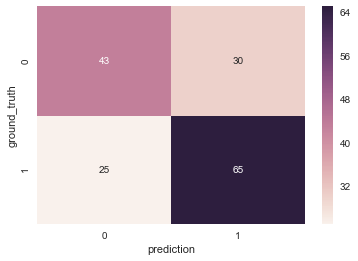

In [32]:
# confused? here it is explanation
sns.heatmap(confusion_matrix(Y_test, lr_clf.predict(X_test)), annot=True, fmt='d')
plt.xlabel("prediction")
plt.ylabel("ground_truth")

In [33]:
# raw predictions
lr_clf.predict(X_test)

array([ True,  True,  True,  True, False,  True,  True, False, False,
        True,  True, False,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True, False,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True, False, False,  True, False, False,
        True,  True, False, False, False, False, False,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True, False,  True, False,  True,  True,  True, False, False,
        True, False, False, False,  True,  True,  True, False,  True,
        True, False,  True,  True, False,  True, False,  True,  True,
        True, False,  True,  True, False, False, False, False,  True,
       False,  True,  True,  True,  True, False, False,  True, False,
        True, False, False,  True,  True, False,  True,  True, False,
        True, False,

In [34]:
# predicting probabilities
lr_clf.predict_proba(X_test)[:10]

array([[ 0.39702646,  0.60297354],
       [ 0.37241212,  0.62758788],
       [ 0.28259795,  0.71740205],
       [ 0.28225091,  0.71774909],
       [ 0.80921298,  0.19078702],
       [ 0.33777889,  0.66222111],
       [ 0.07602056,  0.92397944],
       [ 0.99682957,  0.00317043],
       [ 0.64259732,  0.35740268],
       [ 0.40023989,  0.59976011]])

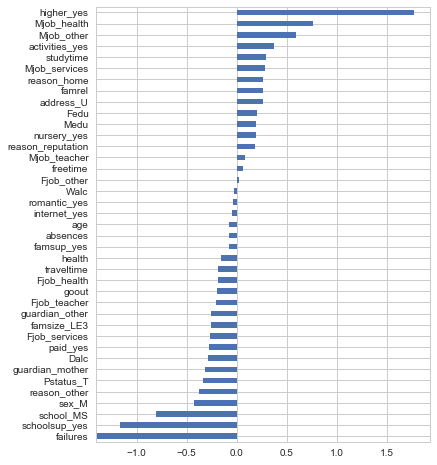

In [15]:
# danger - unweighted
pd.Series(logreg.coef_[0], index=X.columns).sort_values().plot('barh', figsize=(6, 8))